In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
import seaborn as sns

import matplotlib.ticker as ticker


## Fibonaccijeva števila

## Analiza paralelnega izračuna Fibonaccijevih števil v odvisnosti od števila domen

In [3]:
df_fib_domains = pd.read_csv('fib_par_domains.csv')
df_fib_domains.head()

,num_domains,time
0,1,1.509
1,2,0.821
2,3,0.620
3,4,0.475
4,5,0.391


/var/folders/pd/s74qyrkd2211zy6clmt1fvg80000gn/T/ipykernel_51530/236721337.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='black')


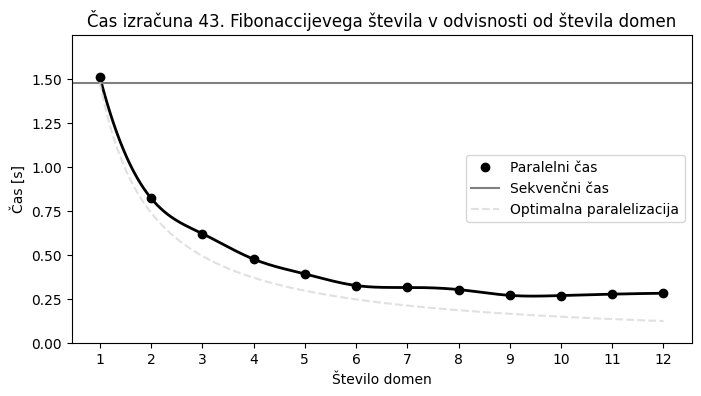

In [4]:
seq_computation_time_fib = 1.478

# Create a new figure
plt.figure(figsize=(8, 4))

# Making the line plot smoother using scipy
xnew = np.linspace(df_fib_domains['num_domains'].min(), df_fib_domains['num_domains'].max(), 500) 
spl = make_interp_spline(df_fib_domains['num_domains'], df_fib_domains['time'], k=3)
power_smooth = spl(xnew)

# Plot the smooth line
plt.plot(xnew, power_smooth, 'b-', linewidth=2, color='black')

# Plot the data points
plt.plot(df_fib_domains['num_domains'], df_fib_domains['time'], 'ko', label='Paralelni čas')

# Add a straight horizontal line at y=2.9
plt.axhline(y=seq_computation_time_fib, color='grey', label='Sekvenčni čas')

plt.plot(xnew, seq_computation_time_fib/xnew, color='lightgray', linestyle='--', linewidth=1.5, alpha=0.7, label='Optimalna paralelizacija')


# Add title and labels
plt.title('Čas izračuna 43. Fibonaccijevega števila v odvisnosti od števila domen')
plt.xlabel('Število domen')
plt.ylabel('Čas [s]')

# Adjust x-axis to show discrete values
plt.xticks(range(1, 13))

# Adding a grid
# plt.grid(True)
plt.ylim(0, 1.75)
plt.yticks(np.arange(0, 1.75, 0.25))

# Adding a legend
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_domen.pdf')

# Display the plot
plt.show()


## Analiza časa izračuna n-tega Fibonaccijevega števila pri fiksnem številu domen

### sequential_threshold = 38

In [5]:
data = pd.read_csv('fib_par_n.csv')
data.head()

,fib_number,par_time,seq_time
0,38,0.136,0.136
1,39,0.143,0.218
2,40,0.143,0.351
3,41,0.144,0.571
4,42,0.157,0.940


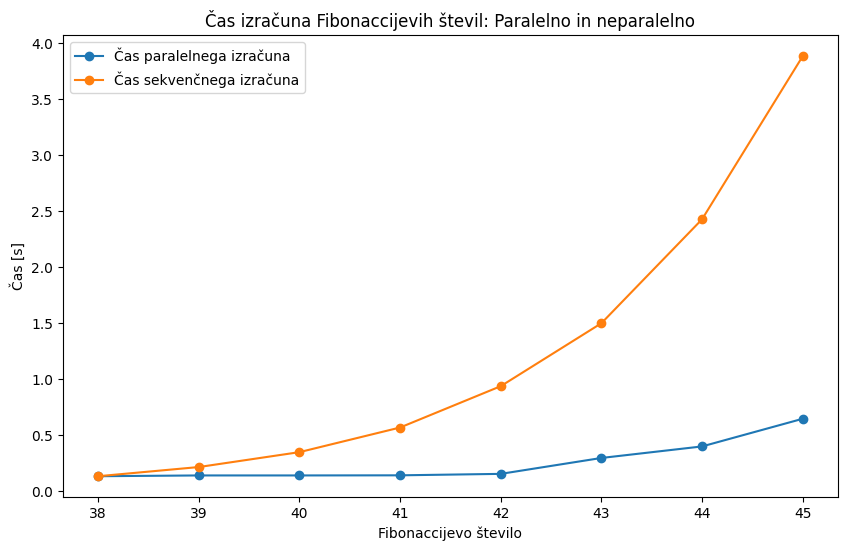

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data['fib_number'], data['par_time'], marker='o', label='Čas paralelnega izračuna')
plt.plot(data['fib_number'], data['seq_time'], marker='o', label='Čas sekvenčnega izračuna')
plt.xlabel('Fibonaccijevo število')
plt.ylabel('Čas [s]')
plt.title('Čas izračuna Fibonaccijevih števil: Paralelno in neparalelno')
plt.legend()

plt.savefig('fib_par_v_odvisnosti_od_n.pdf')

# Prikaz grafa
plt.show()



## BFS

### Analiza časa izvajanja BFS algoritma v odvisnosti od velikosti grafa

In [6]:
df_bfs_combinations = pd.read_csv('bfs_par_combinations.csv')

In [7]:
df_bfs_combinations.head()

,num_nodes,num_edges,parallel_time,sequential_time
0,500,12475,0.003,0.002
1,1000,49950,0.010,0.008
2,1500,112425,0.023,0.021
3,2000,199900,0.038,0.038
4,2500,312375,0.065,0.059


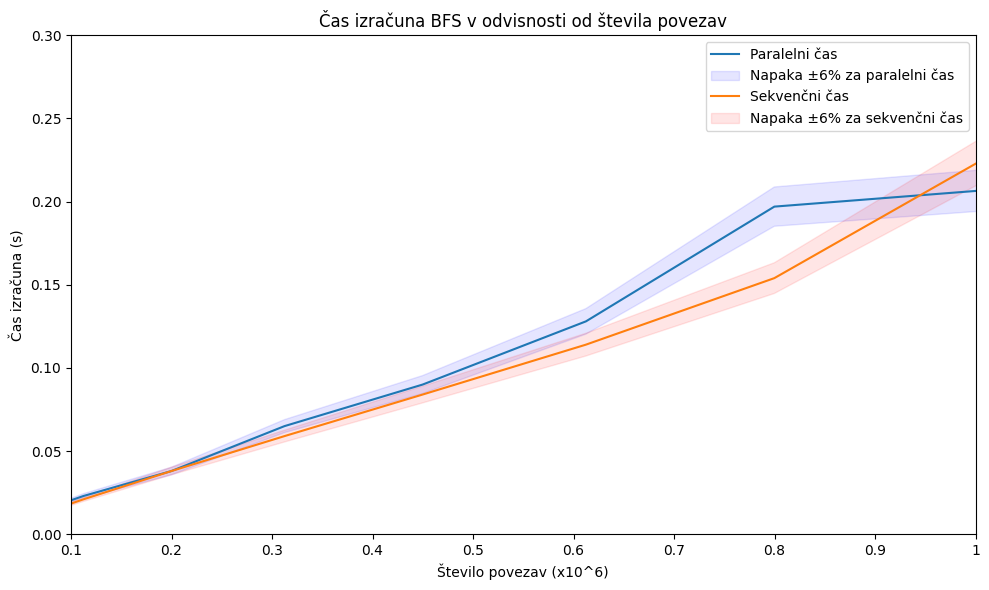

In [8]:
plt.figure(figsize=(10, 6))

error_margin_seq = df_bfs_combinations['sequential_time'] * 0.06
error_margin_par = df_bfs_combinations['parallel_time'] * 0.06

# Plot the computation time as a function of num_edges
plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['parallel_time'], label='Paralelni čas')

plt.fill_between(df_bfs_combinations['num_edges'],
                 df_bfs_combinations['parallel_time'] - error_margin_par,
                 df_bfs_combinations['parallel_time'] + error_margin_par,
                 color='blue', alpha=0.1, label='Napaka ±6% za paralelni čas')


plt.plot(df_bfs_combinations['num_edges'], df_bfs_combinations['sequential_time'], label='Sekvenčni čas')


plt.fill_between(df_bfs_combinations['num_edges'],
                 df_bfs_combinations['sequential_time'] - error_margin_seq,
                 df_bfs_combinations['sequential_time'] + error_margin_seq,
                 color='red', alpha=0.1, label='Napaka ±6% za sekvenčni čas')


plt.xlabel('Število povezav (x10^6)')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila povezav')

# Format x-axis
scale_x = 1e6
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
plt.gca().xaxis.set_major_formatter(ticks_x)

# Set x-axis limits and ticks
plt.xlim(100000, 1000000)
plt.xticks(range(100000, 1000001, 100000))

plt.ylim(0, 0.3)


plt.legend()

# Display the plot with a bit of padding
plt.tight_layout()

plt.savefig('bfs_v_odvisnosti_od_velikosti_grafa.pdf')


plt.show()


### Analiza časa izvajanja algoritma BFS v odvisnosti od števila domen

In [4]:
df_bfs_par_domains = pd.read_csv('bfs_par_domains.csv')
df_bfs_par_domains

,num_domains,time
0,1,0.268
1,2,0.240
2,3,0.242
3,4,0.241
4,5,0.240
5,6,0.236
6,7,0.238
7,8,0.246
8,9,0.245
9,10,0.252


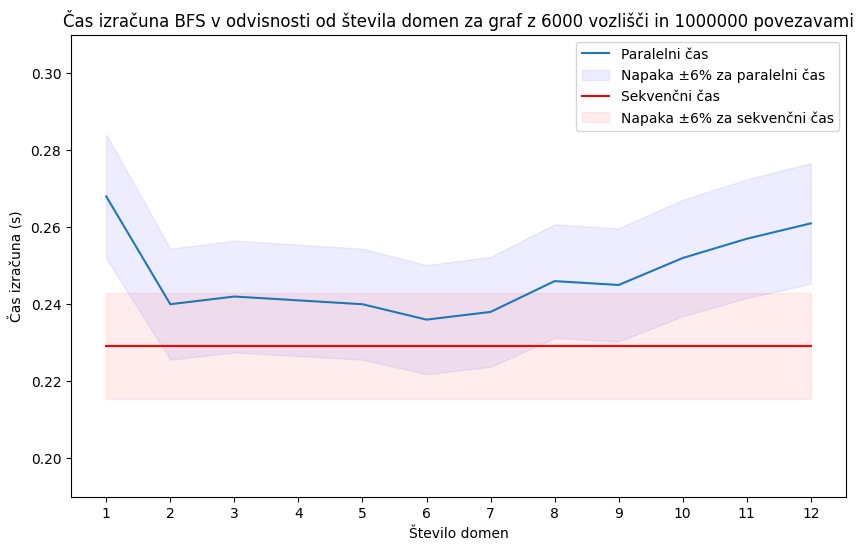

In [6]:
seq_computation_time = 0.229221
# Error margin calculation
error_margin_seq = seq_computation_time * 0.06
error_margin_par = df_bfs_par_domains['time'] * 0.06

plt.figure(figsize=(10, 6))
plt.plot(df_bfs_par_domains['num_domains'], df_bfs_par_domains['time'], label='Paralelni čas')

# Adding error margin for the parallel times as shaded area
plt.fill_between(df_bfs_par_domains['num_domains'],
                 df_bfs_par_domains['time'] - error_margin_par,
                 df_bfs_par_domains['time'] + error_margin_par,
                 color='blue', alpha=0.07, label='Napaka ±6% za paralelni čas')

plt.plot([1, 12], [seq_computation_time, seq_computation_time], color='r', linestyle='-', label='Sekvenčni čas')


plt.fill_between(range(1, 13), seq_computation_time - error_margin_seq, seq_computation_time + error_margin_seq, color='r', alpha=0.07, label='Napaka ±6% za sekvenčni čas')


plt.xlabel('Število domen')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna BFS v odvisnosti od števila domen za graf z 6000 vozlišči in 1000000 povezavami')

plt.legend()

plt.xticks(range(1, 13))
# Set the y-axis limits
plt.ylim(0.19, 0.31)

plt.savefig('bfs_v_odvisnosti_od_stevila_domen.pdf')

plt.show()


## Dijkstra

### Analiza časa izvajanja algoritma BFS v odvisnosti od števila domen

In [8]:
df_dijkstra_par_domains = pd.read_csv('dijkstra_par_domains.csv')

In [9]:
df_dijkstra_par_domains

,num_domains,par_type,time
0,1,regular,2.058
1,1,with_mutex,2.298
2,2,regular,0.988
3,2,with_mutex,5.766
4,3,regular,0.911
5,3,with_mutex,13.767
6,4,regular,1.019
7,4,with_mutex,10.689
8,5,regular,1.483
9,5,with_mutex,13.623


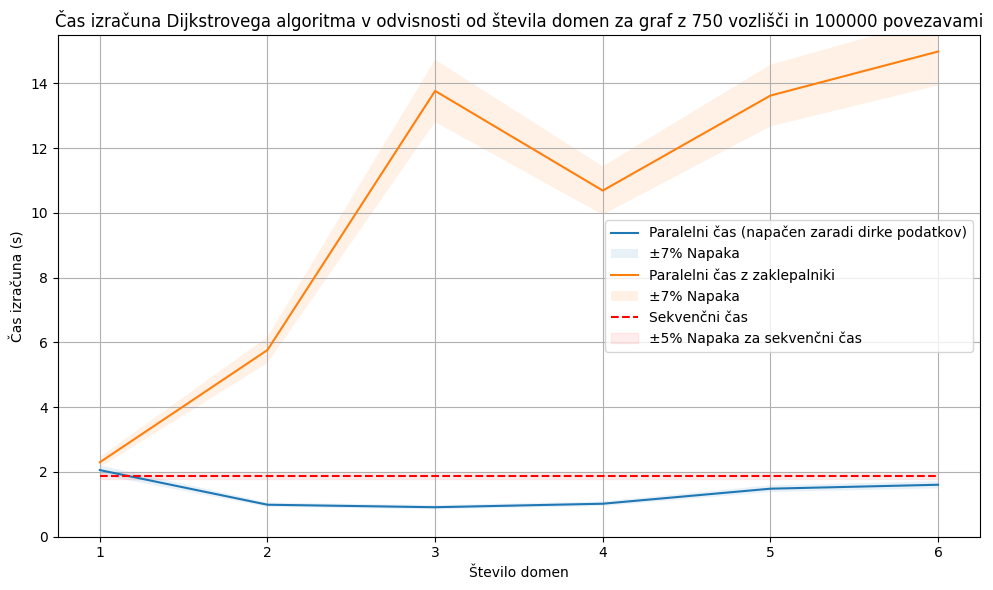

In [11]:
# Adjusting approach to ensure data compatibility and avoid the error
# This involves directly manipulating data frames and ensuring no operations lead to unexpected data types
df_regular = df_dijkstra_par_domains[df_dijkstra_par_domains['par_type'] == 'regular']
df_with_mutex = df_dijkstra_par_domains[df_dijkstra_par_domains['par_type'] == 'with_mutex']
dijkstra_seq_computation_time = 1.89
error_margin_seq = dijkstra_seq_computation_time * 0.05

# Recalculate error margins with corrected data types
parallel_error_margin = 0.07

plt.figure(figsize=(10, 6))

# Plotting the lines for 'regular' and 'with_mutex' with their respective error margins
for label, df in [('Paralelni čas (napačen zaradi dirke podatkov)', df_regular), ('Paralelni čas z zaklepalniki', df_with_mutex)]:
    plt.plot(df['num_domains'], df['time'], label=label)
    plt.fill_between(df['num_domains'], df['time'] - df['time'] * parallel_error_margin, df['time'] + df['time'] * parallel_error_margin, alpha=0.1, label='±7% Napaka')

# Adding a horizontal line for sequential computation time and its error margin
plt.hlines(dijkstra_seq_computation_time, df_dijkstra_par_domains['num_domains'].min(), df_dijkstra_par_domains['num_domains'].max(), colors='r', linestyles='--', label='Sekvenčni čas')
plt.fill_betweenx([dijkstra_seq_computation_time - error_margin_seq, dijkstra_seq_computation_time + error_margin_seq], df_dijkstra_par_domains['num_domains'].min(), df_dijkstra_par_domains['num_domains'].max(), color='red', alpha=0.07, label='±5% Napaka za sekvenčni čas')

plt.xlabel('Število domen')
plt.ylabel('Čas izračuna (s)')
plt.title('Čas izračuna Dijkstrovega algoritma v odvisnosti od števila domen za graf z 750 vozlišči in 100000 povezavami')
plt.legend()
plt.xticks(df_dijkstra_par_domains['num_domains'].unique())
plt.grid(True)
plt.ylim(0, max(df_dijkstra_par_domains['time'].max() + 0.5, dijkstra_seq_computation_time + error_margin_seq + 0.1))

plt.tight_layout()
plt.savefig('dijkstra_v_odvisnosti_od_stevila_domen.pdf')

plt.show()


## Floyd-Warshall

### Analiza časa izvajanja Floyd-Warshallovega algoritma v odvisnosti od števila domen

In [17]:
df_floyd_par_domains = pd.read_csv('floyd_par_domains.csv')

In [18]:
df_floyd_par_domains

,num_domains,time
0,1,8.286568
1,2,4.284036
2,3,3.032485
3,4,2.248320
4,5,2.006529
5,6,1.790124
6,7,2.363587
7,8,2.679032
8,9,2.837990
9,10,3.214972


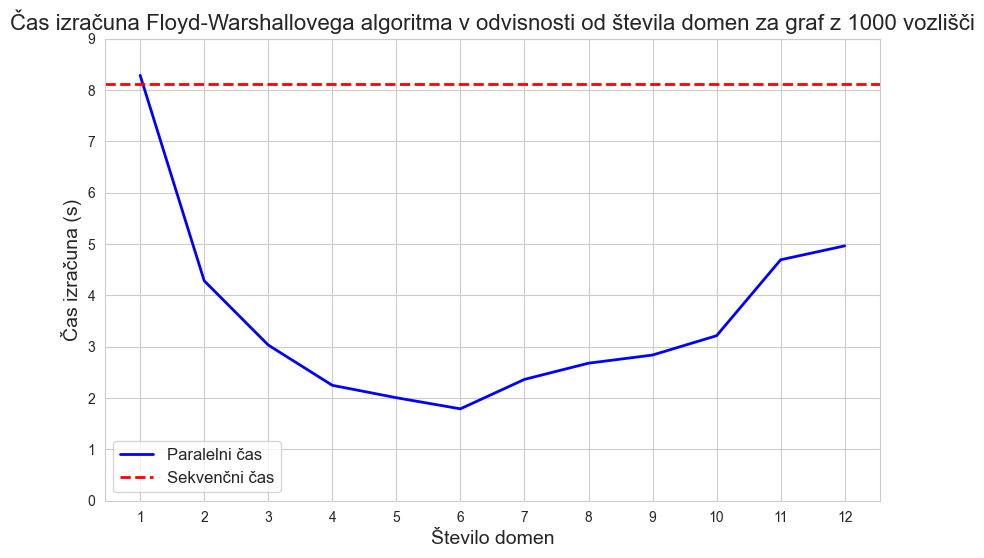

In [19]:
# Set the style of seaborn for better looking plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

seq_computation_time = 8.111

# Change the line style and color for better visibility
plt.plot(df_floyd_par_domains['num_domains'], df_floyd_par_domains['time'], label='Paralelni čas', color='blue', linewidth=2)

# Adding a horizontal line for the sequential execution time
plt.axhline(y=seq_computation_time, color='r', linestyle='dashed', linewidth=2, label='Sekvenčni čas')

plt.xlabel('Število domen', fontsize=14)
plt.ylabel('Čas izračuna (s)', fontsize=14)
plt.title('Čas izračuna Floyd-Warshallovega algoritma v odvisnosti od števila domen za graf z 1000 vozlišči', fontsize=16)
plt.xticks(range(1, 13))

plt.legend(fontsize=12)

plt.ylim(0, 9)

plt.savefig('floyd_v_odvisnosti_od_stevila_domen.pdf')

plt.show()

### Analiza časa izvajanja Floyd-Warshallovega algoritma v odvisnosti od velikosti grafa

In [13]:
df_floyd_combinations = pd.read_csv('floyd_par_combinations.csv')

In [14]:
df_floyd_combinations

,num_nodes,num_edges,par_time,seq_time
0,1000,149850,1.824,8.425
1,950,135232,1.602,7.154
2,900,121365,1.349,6.138
3,850,108247,1.080,5.032
4,800,95880,0.876,4.200
5,750,84262,0.708,3.459
6,700,73395,0.566,2.823
7,650,63277,0.465,2.268
8,600,53910,0.380,1.793
9,550,45292,0.289,1.387


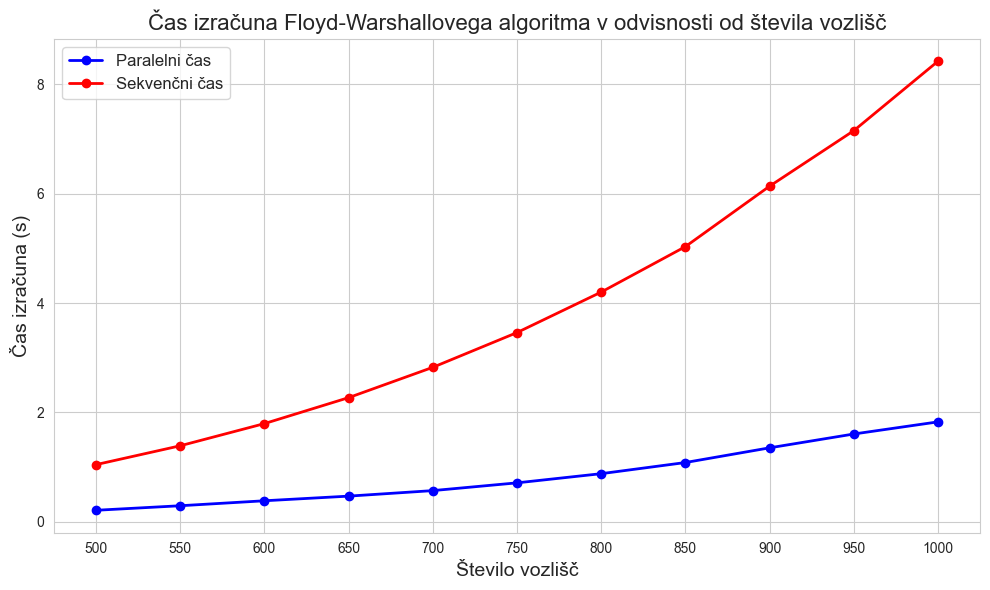

In [15]:
# Set the style to 'dark_background'
# plt.style.use('dark_background')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Change the line style and color for better visibility
plt.plot(df_floyd_combinations['num_nodes'], df_floyd_combinations['par_time'], label='Paralelni čas', color='blue', linewidth=2, marker='o')
plt.plot(df_floyd_combinations['num_nodes'], df_floyd_combinations['seq_time'], label='Sekvenčni čas', color='r', linewidth=2, marker='o')

plt.xlabel('Število vozlišč', fontsize=14)
plt.ylabel('Čas izračuna (s)', fontsize=14)
plt.title('Čas izračuna Floyd-Warshallovega algoritma v odvisnosti od števila vozlišč', fontsize=16)

# Set the x-axis ticks to [500, 550, 600, 650, ..., 950, 1000]
plt.xticks(range(500, 1001, 50))

plt.legend(fontsize=12)

# plt.savefig doesn't work. I save the image manually and upload it to ./diploma/slike
plt.tight_layout()

plt.savefig('floyd_v_odvisnosti_od_velikosti_grafa.pdf')

plt.show()

## Kaj lahko od paralelnega programa pricakujemo?

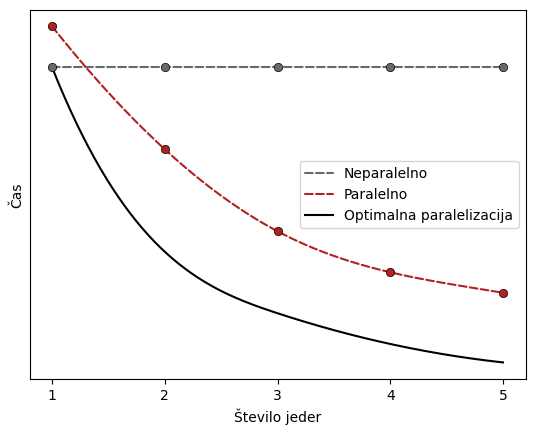

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

num_cores = np.array([1, 2, 3, 4, 5])
time_non_parallel = np.array([9, 9, 9, 9, 9])
time_parallel = np.array([10, 7, 5, 4, 3.5])

spl_non_parallel = make_interp_spline(num_cores, time_non_parallel, k=3)
spl_parallel = make_interp_spline(num_cores, time_parallel, k=3)
spl_ideal_speedup = make_interp_spline(num_cores, time_non_parallel[0] / num_cores, k=3)

xnew = np.linspace(num_cores.min(), num_cores.max(), 300)

smooth_non_parallel = spl_non_parallel(xnew)
smooth_parallel = spl_parallel(xnew)
smooth_ideal_speedup = spl_ideal_speedup(xnew)

plt.plot(xnew, smooth_non_parallel, color='dimgray', linestyle='--', linewidth=1.5, dash_capstyle='round', label='Neparalelno')
plt.scatter(num_cores, time_non_parallel, color='dimgray', edgecolors='black', linewidths=0.5, zorder=3)

plt.plot(xnew, smooth_parallel, color='firebrick', linestyle='--', linewidth=1.5, dash_capstyle='round', label='Paralelno')
plt.scatter(num_cores, time_parallel, color='firebrick', edgecolors='black', linewidths=0.5, zorder=3)

plt.plot(xnew, smooth_ideal_speedup, color='black', linestyle='-', linewidth=1.5, label='Optimalna paralelizacija')

plt.xlabel('Število jeder')
plt.ylabel('Čas')
plt.yticks([])
plt.xticks(num_cores)

plt.legend()

plt.savefig('cilj-casovne-zahtevnosti-paralelizacije.pdf')

plt.show()
